In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fp = pd.read_csv('Fertilizer Prediction.csv')

In [3]:
fp.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [5]:
fp['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [12]:
fp.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [13]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [14]:
fp.head(10)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
5,26,52,35,Sandy,Barley,12,10,13,17-17-17
6,25,50,64,Red,Cotton,9,0,10,20-20
7,33,64,50,Loamy,Wheat,41,0,0,Urea
8,30,60,42,Sandy,Millets,21,0,18,28-28
9,29,58,33,Black,Oil seeds,9,7,30,14-35-14


In [15]:
ct = fp['Crop Type']
st = fp['Soil Type']

In [43]:
ct.to_csv('Crop Type.csv')
st.to_csv('Soil Type.csv')

In [16]:
st_onehot = pd.get_dummies(st)
st_onehot

,Black,Clayey,Loamy,Red,Sandy
0,0,0,0,0,1
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
94,0,1,0,0,0
95,0,0,0,1,0
96,0,0,1,0,0
97,0,0,0,0,1


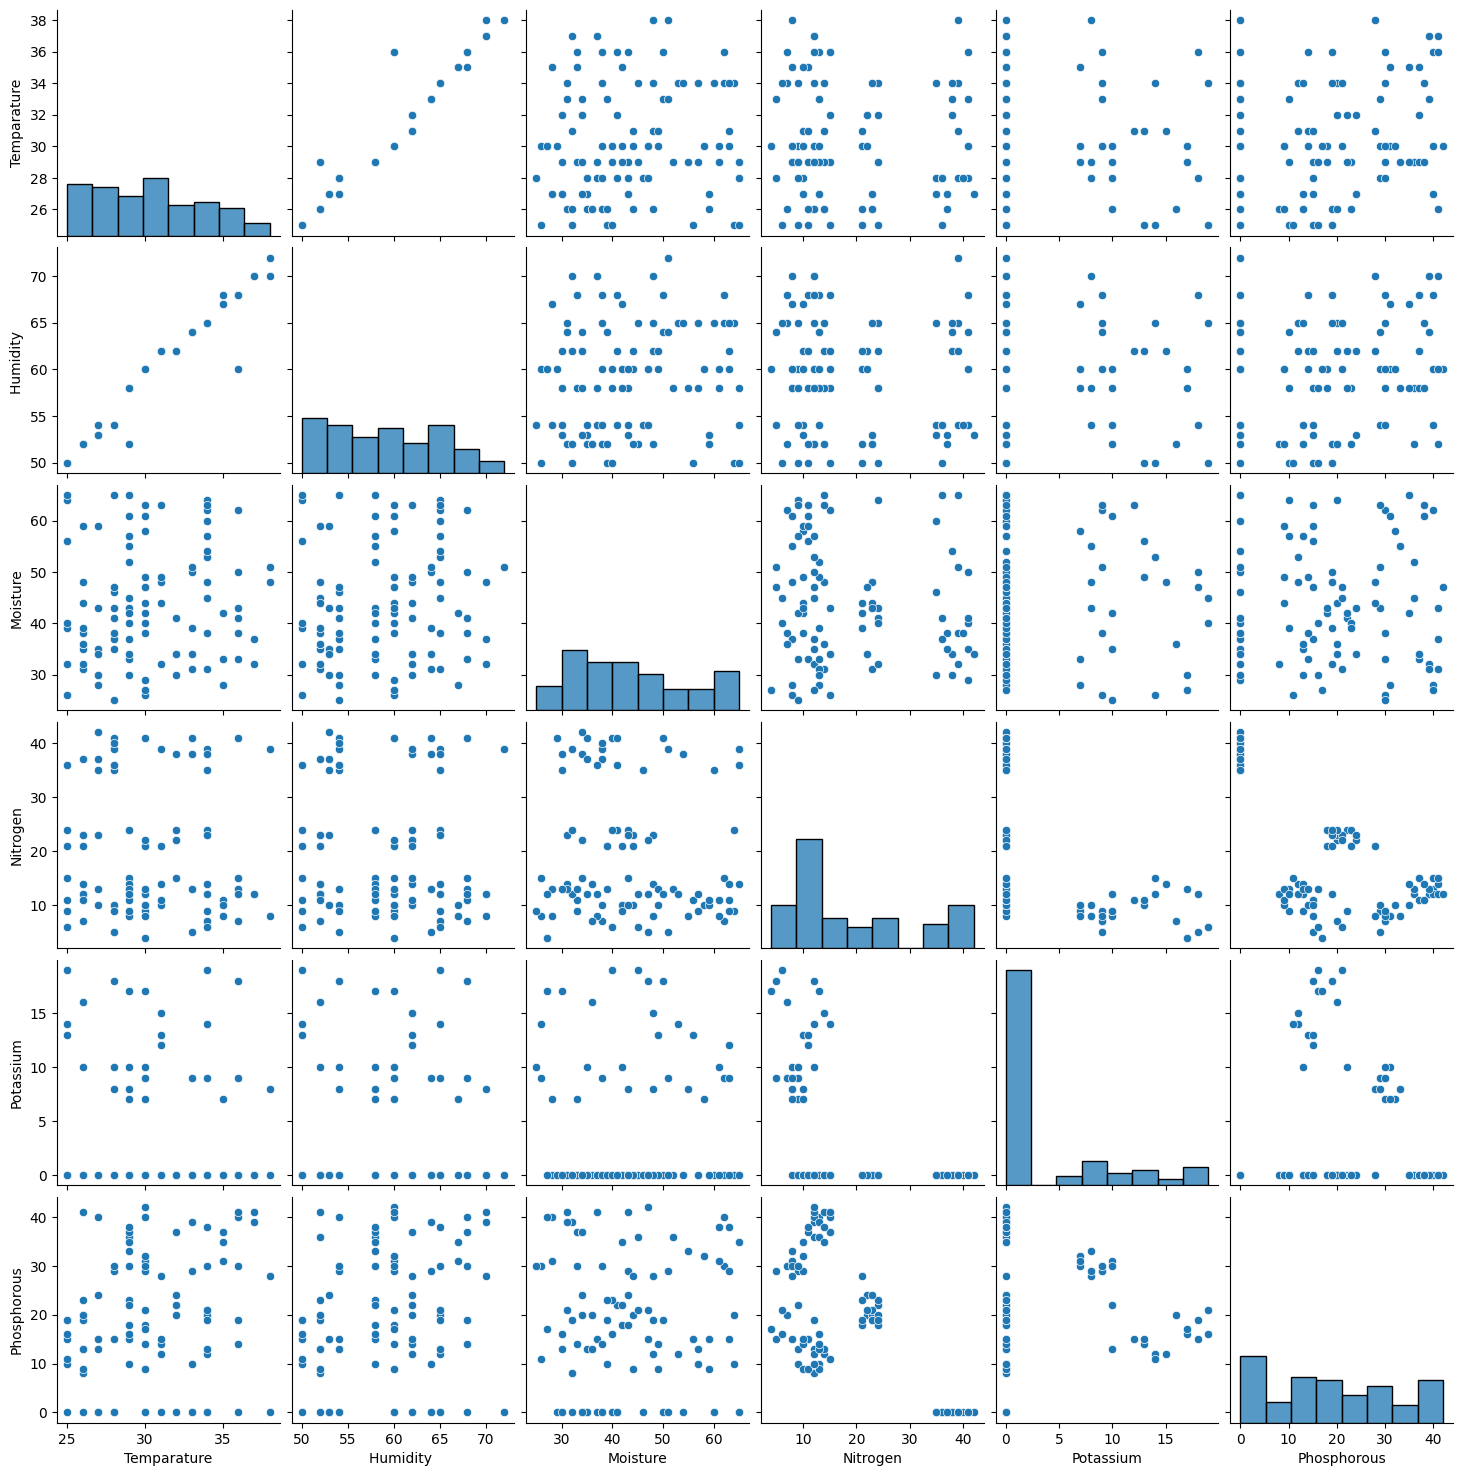

In [6]:
sns.pairplot(fp)

<ipython-input-7-9815846b36fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fp.corr(),annot=True)


<Axes: >

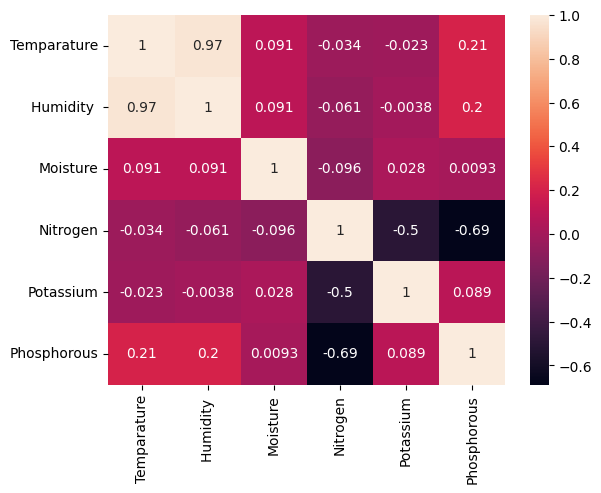

In [7]:
sns.heatmap(fp.corr(),annot=True)

In [8]:
fert = fp[fp.columns[-1]]

In [42]:
fert.to_csv('Fertilizer Name.csv')

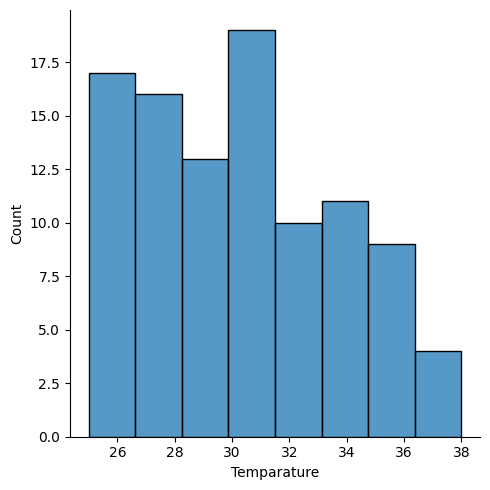

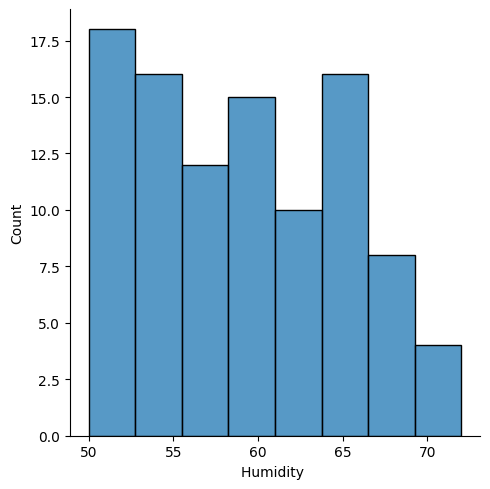

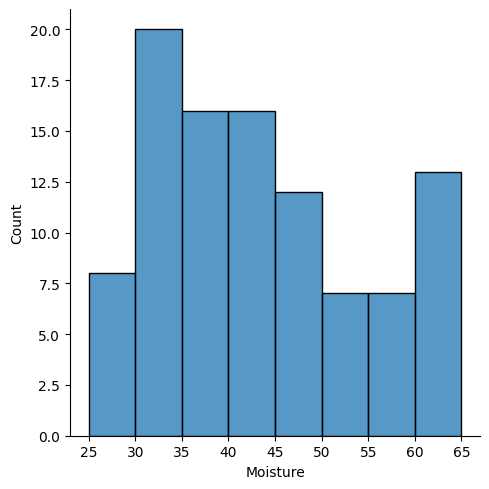

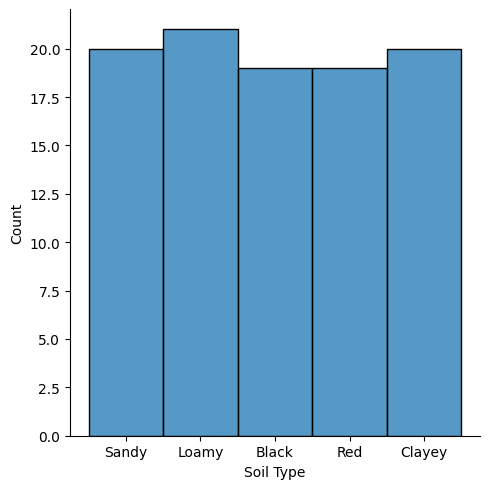

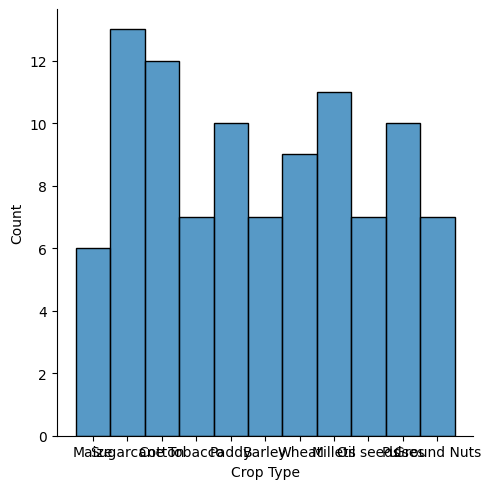

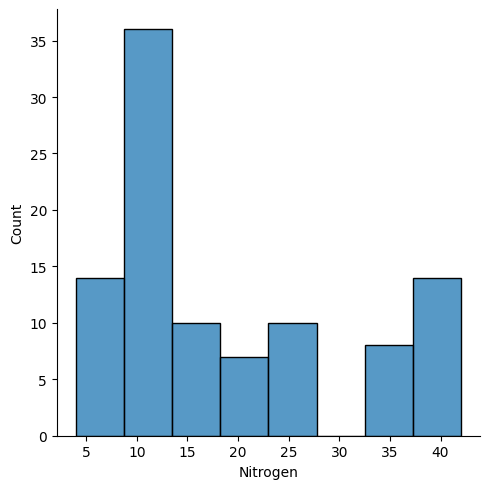

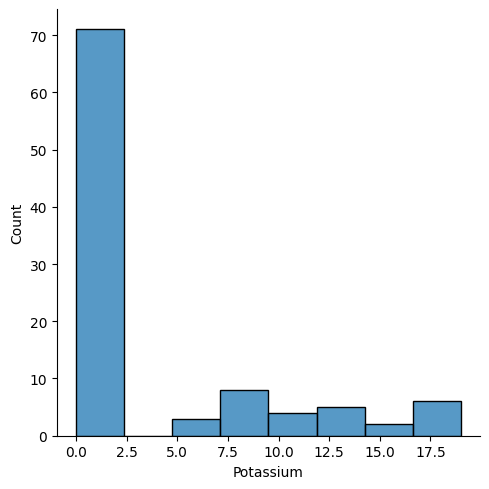

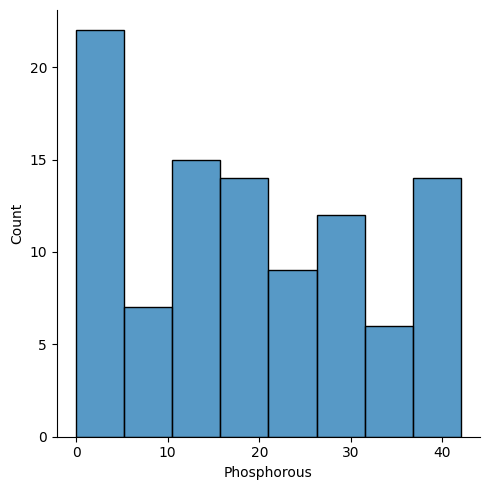

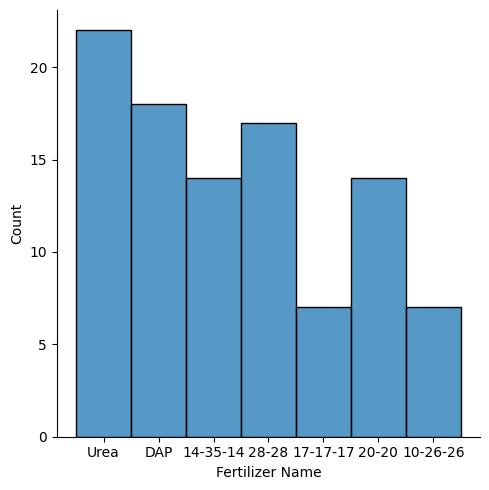

In [9]:
for col in fp.columns:
  sns.displot(fp[col])

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [17]:
dat = fp

In [29]:
dat.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [30]:
dat.drop(columns=['Soil Type', 'Crop Type','Fertilizer Name'],inplace=True)
dat

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,26,52,38,37,0,0
1,29,52,45,12,0,36
2,34,65,62,7,9,30
3,32,62,34,22,0,20
4,28,54,46,35,0,0
...,...,...,...,...,...,...
94,25,50,32,24,0,19
95,30,60,27,4,17,17
96,38,72,51,39,0,0
97,36,60,43,15,0,41


In [26]:
dt = pd.concat([dat,st_onehot],axis=1)
dt.drop(columns=['Fertilizer Name'],inplace=True)
dt.drop(columns=['Crop Type','Soil Type'],inplace=True)
dt

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,Sandy
0,26,52,38,37,0,0,0,0,0,0,1
1,29,52,45,12,0,36,0,0,1,0,0
2,34,65,62,7,9,30,1,0,0,0,0
3,32,62,34,22,0,20,0,0,0,1,0
4,28,54,46,35,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,0,1,0,0,0
95,30,60,27,4,17,17,0,0,0,1,0
96,38,72,51,39,0,0,0,0,1,0,0
97,36,60,43,15,0,41,0,0,0,0,1


In [27]:
dt.to_csv('FRDATA_NOTCAT_ONEHOT_UNSCALED.csv')

In [34]:
data02 = pd.concat([pd.DataFrame(ss.fit_transform(dat)),st_onehot],axis=1)

In [35]:
data02

,0,1,2,3,4,5,Black,Clayey,Loamy,Red,Sandy
0,-1.229084,-1.230737,-0.462064,1.567539,-0.584910,-1.387607,0,0,0,0,1
1,-0.368145,-1.230737,0.162128,-0.598658,-0.584910,1.297209,0,0,1,0,0
2,1.066752,1.006492,1.678023,-1.031898,0.970777,0.849740,1,0,0,0,0
3,0.492793,0.490209,-0.818745,0.267821,-0.584910,0.103958,0,0,0,1,0
4,-0.655125,-0.886548,0.251298,1.394244,-0.584910,-1.387607,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
94,-1.516063,-1.574926,-0.997086,0.441117,-0.584910,0.029379,0,1,0,0,0
95,-0.081166,0.146020,-1.442938,-1.291841,2.353610,-0.119777,0,0,0,1,0
96,2.214670,2.211154,0.697150,1.740835,-0.584910,-1.387607,0,0,1,0,0
97,1.640711,0.146020,-0.016213,-0.338715,-0.584910,1.670100,0,0,0,0,1


In [39]:
list(dat.columns)+list(st_onehot.columns)

['Temparature',
 'Humidity ',
 'Moisture',
 'Nitrogen',
 'Potassium',
 'Phosphorous',
 'Black',
 'Clayey',
 'Loamy',
 'Red',
 'Sandy']

In [40]:
data02.columns = list(dat.columns)+list(st_onehot.columns)
data02

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Black,Clayey,Loamy,Red,Sandy
0,-1.229084,-1.230737,-0.462064,1.567539,-0.584910,-1.387607,0,0,0,0,1
1,-0.368145,-1.230737,0.162128,-0.598658,-0.584910,1.297209,0,0,1,0,0
2,1.066752,1.006492,1.678023,-1.031898,0.970777,0.849740,1,0,0,0,0
3,0.492793,0.490209,-0.818745,0.267821,-0.584910,0.103958,0,0,0,1,0
4,-0.655125,-0.886548,0.251298,1.394244,-0.584910,-1.387607,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
94,-1.516063,-1.574926,-0.997086,0.441117,-0.584910,0.029379,0,1,0,0,0
95,-0.081166,0.146020,-1.442938,-1.291841,2.353610,-0.119777,0,0,0,1,0
96,2.214670,2.211154,0.697150,1.740835,-0.584910,-1.387607,0,0,1,0,0
97,1.640711,0.146020,-0.016213,-0.338715,-0.584910,1.670100,0,0,0,0,1


In [41]:
data02.to_csv('FRDATA_NOTCAT_ONEHOT_SCALED.csv')